In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/hospital_readmissions.csv")
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [ ]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64


In [ ]:
# Map 'readmitted' column to binary values
df['readmitted'] = df['readmitted'].map({'yes': 1, 'no': 0})

In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,0


In [ ]:
# Select features and target variable
X = df.drop('readmitted', axis=1)  # Features
y = df['readmitted']               # Target

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
categorical_columns = ['age', 'medical_specialty', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']
numerical_columns = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications',
                     'n_outpatient', 'n_inpatient', 'n_emergency']


In [ ]:
# Preprocessing pipeline for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Encode categorical columns
    ]
)

In [ ]:
# Logistic Regression pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train Logistic Regression
pipeline_lr.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_lr = pipeline_lr.predict(X_test)
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression ROC-AUC: 0.5940195365938445


In [ ]:
# Random Forest pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train Random Forest
pipeline_rf.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = pipeline_rf.predict(X_test)
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest ROC-AUC: 0.5755939403402647


In [ ]:
# XGBoost pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train XGBoost
pipeline_xgb.fit(X_train, y_train)

# Predict and evaluate XGBoost
y_pred_xgb = pipeline_xgb.predict(X_test)
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:38:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost ROC-AUC: 0.5952396098592845


In [ ]:
# Hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_rf.fit(X_train, y_train)

# Best Random Forest model
best_rf = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


Confusion Matrix:
 [[1960  698]
 [1223 1119]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.74      0.67      2658
           1       0.62      0.48      0.54      2342

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.60      5000
weighted avg       0.62      0.62      0.61      5000

ROC-AUC Score: 0.6075966468306369


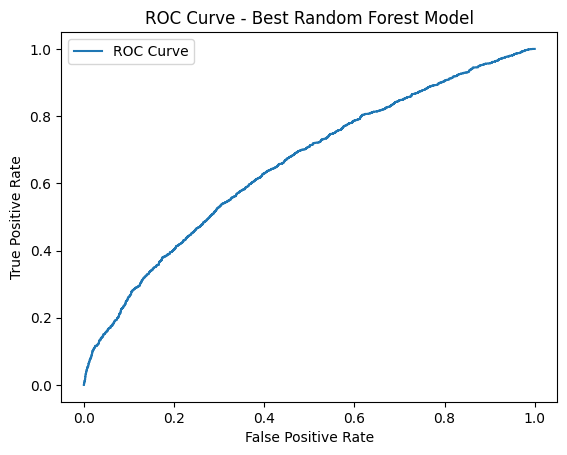

In [ ]:
# Predict using the best model
y_pred_best_rf = best_rf.predict(X_test)

# Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Best Random Forest Model")
plt.legend()
plt.show()